# Анализ рынка игр

# Описание данных:
**Источник данных:** данные о продажах игр, оценках пользователей и критиков, а также рейтингах с 1980 по 2016 год.   
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

# Цели исследования: 
В данном иссследовании нам будет необходимо обработать исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах с 1980 по 2016 год и сделать выводы по следующим вопросам:
1. Количество игр выпускаемое в разные годы
2. Анализ продаж по платформам.
3. Определить актуальный период продаж.
4. Определить потенциально прибыльные платформы.
5. Определить влияние отзывов критиков и пользователй на продажи.
6. Проанализировать распределение игр по жанрам.
7. Составить портрет пользователя каждого региона.
8. Проверить гипотезы о равенстве средних оценок Xbox One и PC, и  жанров Action  и Sports.
9. общий вывод о проведенном исследовании. 

## Предобработка данных

In [1]:
import pandas as pd #импортируем pandas

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns #импортируем seaborn

In [4]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')# сохраним датафрейм в data

In [5]:
data.head(10) #выведим 10 строк данных

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
data.info()# посмотрим информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
data[data['User_Score'] == 'tbd']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


## Подготовка данных

### Изменение регистра

In [8]:
data.columns = data.columns.str.lower() #ариведем названия столбцов к нижнему регистру

### Преобразование типа данных

In [9]:
data['name'] = data['name'].astype('string') #изменим тип данных столбца name на строковый

In [10]:
data['platform'] = data['platform'].astype('string') #изменим тип данных столбца platf

In [11]:
data['year_of_release'] = data['year_of_release'].astype('Int64') #изменим тип данных столбца platform на целочисленный
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format = '%Y', errors = 'ignore')# изменим тип данных на дату

In [12]:
data['genre'] = data['genre'].astype('string') #изменим тип данных столбца genre на строковый

In [13]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce') #переведем user_score в численный формат 


In [14]:
data['rating'] = data['rating'].astype('string') #изменим формат user_score на строковый

 Вывод:
- столбцы 'name', 'paltform', 'genre', 'user_score' содеражт наименования и буквенные обозначения, соответсвенно были переведены в строковый формат;
- столбец 'year_of_realeas' содержит только год выхода, соответственно переведем его в формат даты.

### Обработка пропусков

In [15]:
data.isna().sum() # проверим пропуски в датафрейме

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [16]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm') #визуализируем пропуски в датасете

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


In [17]:
data['genre'].unique() # выведим список жанров 

<StringArray>
[      'Sports',     'Platform',       'Racing', 'Role-Playing',
       'Puzzle',         'Misc',      'Shooter',   'Simulation',
       'Action',     'Fighting',    'Adventure',     'Strategy',
           <NA>]
Length: 13, dtype: string

In [18]:
data[data['user_score'] == 'tbd'] # выведим значения с tbd в оценках пользователей

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [19]:
data['user_score'] = data['user_score'].replace('tbd', -20) #заменим значение tbd на значение "заглушку"

Значение tbd в оценках пользователей означает, что оценка только подлежит определению. Количество таких строк значительно, поэтому удаление их не целесообразно. Для дальнейшей работы с данными заменим tbd на число "заглушку", чтобы в дальнейшем удобнее было работать с данными.

In [20]:
data['user_score'] = data['user_score'].fillna(-20) #заменим пропущенные значения в user_score на число "заглушку"

In [21]:
data['critic_score'] = data['critic_score'].fillna(-20) #заменим пропущенные значения в critic_score на число "заглушку"

Пропущенные значения в user_score и critic_score многочисленны, поэтому их нецелесообразно удалять.  
Заменим пропуски в этих столбцах на число "заглушку", чтобы можно было в дальнейшем удобнее работать с данными.

In [22]:
data['rating'] = data['rating'].fillna('no information')# заменим пропуски в raiting на no information

In [23]:
data.dropna(subset = ['name', 'year_of_release'], inplace = True) # удалим строки с пустыми значениями в столбце name и
#year_of_release

In [24]:
data.reset_index(drop = True, inplace = True) #переназначим индексы

In [25]:
data.duplicated().sum()# проверим на явные дубликаты

0

Вывод:
Пропуски в столбцах critic_score и user_score заполнили медианными значениями в зависимости от жанра игры.  
Пропущенные значения в столбце rating заполнили строкой no information, так как нет возможности установить рейтинг  
исходя из других данных.
Строки с пропущенными значениями в name и year_of_release удалим, так как они малочисленны и нет возможности установить их 
из других данных.


Вывод: Пропуски в столбцах critic_score и user_score заменили на число "заглушку".  
    
1.Пропуски в данных столбцах, вероятно, появились по следующим причинам:    
    - значение tbd означает, что рейтинг будет оценен в дальнейшем.  
    - Отсутвующие значения в ранний период, возможно, свидетельствуют о слабом развитии обратной связи с пользователями.  
      В Более поздний период, о возможной технической ошибке при переносе данных.  
2. Пропущенные значения в столбце rating заполнили строкой no information, так как нет возможности установить рейтинг.
Пропуски в данном стобце возможны по причине, того что не производилось присвоение рейтинга этим играм.  
    3. Строки с пропущенными значениями в name и year_of_release удалим, так как они малочисленны и нет возможности установить их 
из других данных. Пропуски в данном столбце, ввиду их малочисленности, связаны с человеческим фактором.
</div>

### Суммирование продаж по всем регионам

In [26]:
for index in data: #просуммируем продажи за период
    data['summary_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']       

## Исследовательский анализ данных 

### Продажи по годам

In [27]:
annual_sales = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index() #посчитаем количество релизов игр по годам

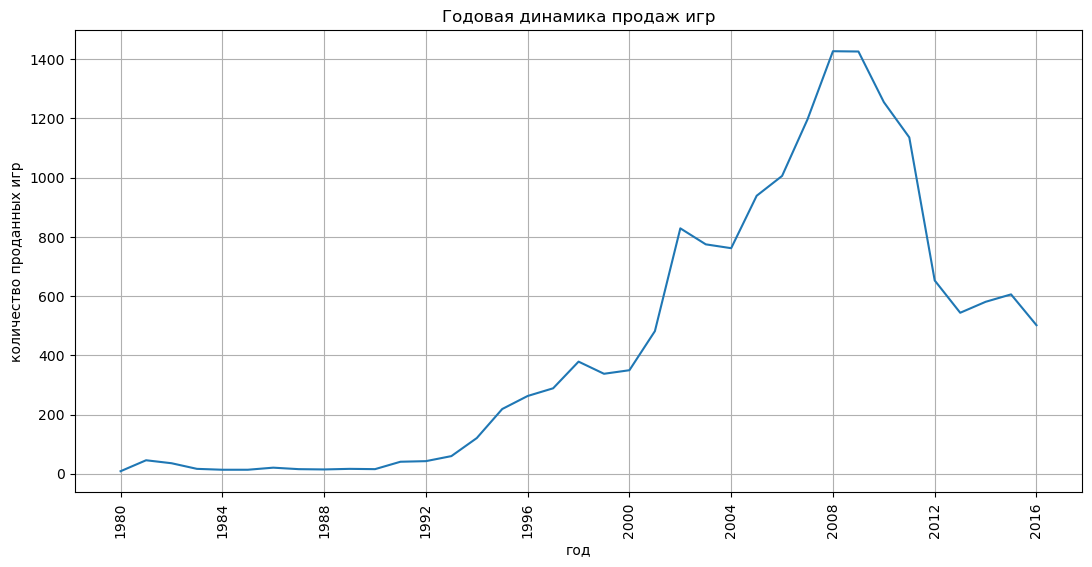

In [28]:
plt.figure(figsize = (13,6))
plt.plot('year_of_release','name', data =annual_sales)
plt.grid()
plt.xticks(rotation = 90)
plt.title('Годовая динамика продаж игр')
plt.xlabel('год')
plt.ylabel('количество проданных игр')
plt.show();

**Вывод**: до середны 1990-х годов не отмечалось резкого роста продаж. С середины 1990-х годов до начала 2010-х наблюдается значительный рост годовых продаж с несколькими плато. с начала 2010-х наблюдается резкий спад годовых продаж. Наиболее интересен период с середины 1990-х годов по 2016 год, так как это период количестово прадаж наиболее велико, а так же наблюдается разнонаправленная динамика.

### Исследование продаж по платформам

In [29]:
platform_sales_all = data.pivot_table(index = 'platform', values = 'name', aggfunc = 'count') \
.sort_values(by = 'name', ascending = False).reset_index()
platform_sales_total = data.pivot_table(index = 'platform', values = 'name', aggfunc = 'count') \
.sort_values(by = 'name', ascending = False) \
#создадим таблицу с суммарными продажами по платформам 

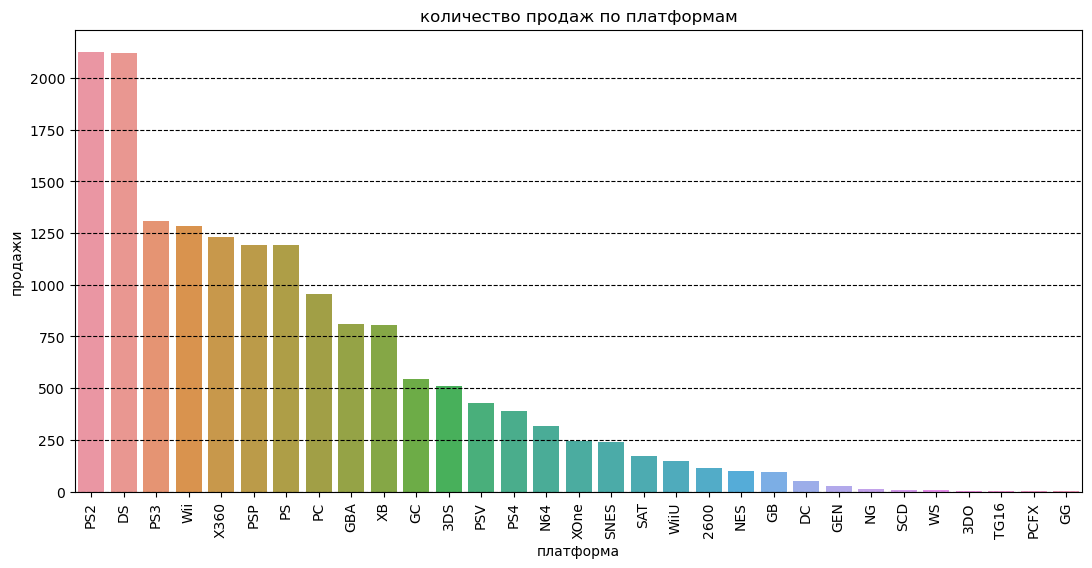

In [30]:
plt.figure(figsize = (13,6))
sns.barplot(data = platform_sales_all, x = 'platform', y = 'name')
plt.grid(axis = 'y', color ='k', linestyle = '--')
plt.title('количество продаж по платформам')
plt.xlabel('платформа')
plt.ylabel('продажи')
plt.xticks(rotation = 90)
plt.show();

In [31]:
platforms_top_sales = platform_sales_total.index #выберим наименования платформ 

In [32]:
platforms_top_sales = platforms_top_sales[0:9] #выберим наиболее значимые по продажам платформы 

In [33]:
platform_top = data.query('platform in @platforms_top_sales') #сделаем срез из исходного датафрейма по этим платформам

In [34]:
platform_top_pivot = platform_top.pivot_table(index = 'year_of_release', columns = 'platform', values = 'name', aggfunc = 'count')
#создадим сводную таблицу по ежегодным продажам на выбранных платформах

In [35]:
platform_top 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16437,Woody Woodpecker in Crazy Castle 5,GBA,2002-01-01,Platform,0.01,0.00,0.00,0.00,-20.0,-20.0,no information,0.01
16438,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,0.00,0.00,0.00,0.00,-20.0,-20.0,no information,0.00
16439,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,-20.0,-20.0,no information,0.01
16440,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,-20.0,-20.0,no information,0.01


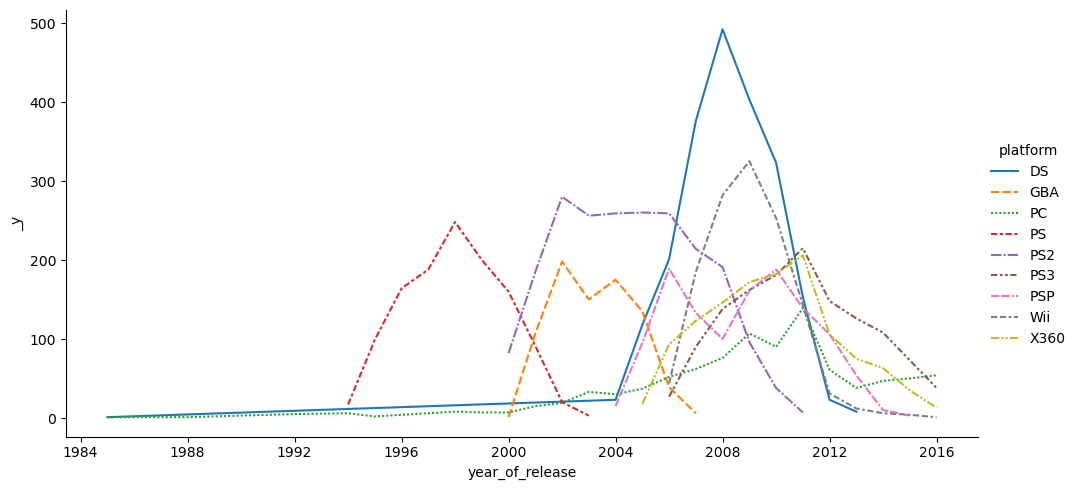

In [36]:
ax =sns.relplot(data = platform_top_pivot, kind="line", height= 5, aspect = 2)
plt.show();

Вывод: Проанализировав график ежегодных продаж наиболее значимых платформ можно сделать вывод, что средний срок жизни платформы
~ 5 лет

### Срез актуального периода

In [37]:
current_data = data.query('year_of_release >= 2012') # сделаем срез данных с 2012 года (5 лет)

### Исследование продаж за актуальный период

<AxesSubplot:title={'center':'currentv sales dynamics'}, xlabel='year_of_release'>

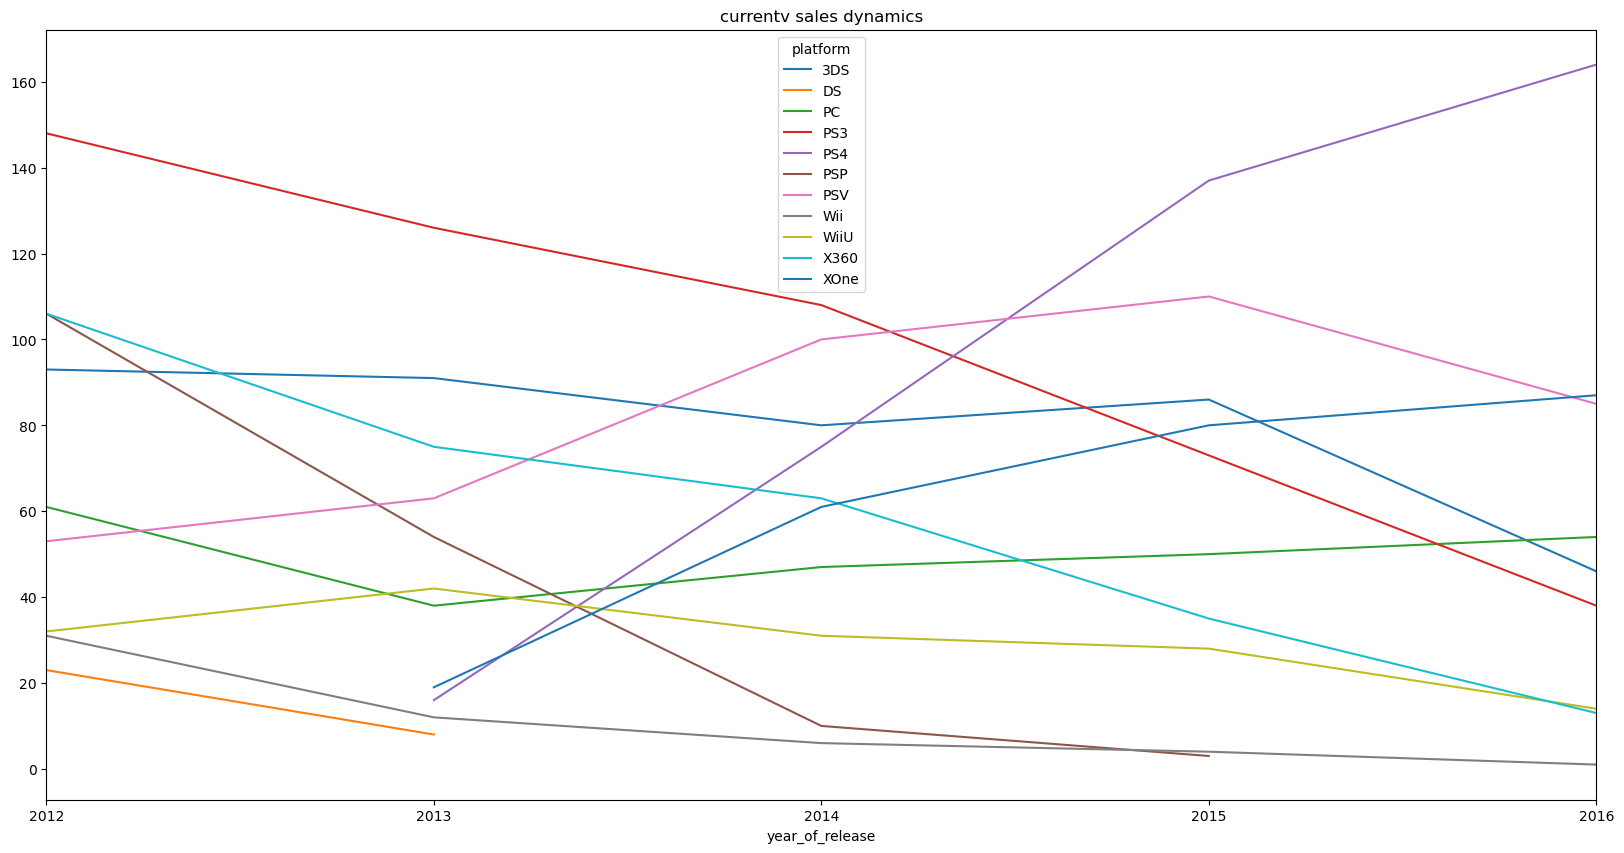

In [38]:
current_data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'name', aggfunc = 'count').plot(kind = 'line', figsize = (20,10), title = 'currentv sales dynamics')
#построим график динамики продаж за актуальный период

Вывод: За актуальный период лидеры суммарных продаж это PS3, 3DS и PSV, однако, эти платформы находятся в конце своего жизненного
    цикла. Проанализировав динамику продаж за актуальный период, можно сделать вывод, что потненциально прибыльные платформы это PS4, XOne и PC. Отсальные платформы находятся в стадии спада ежегодных продаж.

### Анализ продаж по платфомам

(0.0, 2.3)

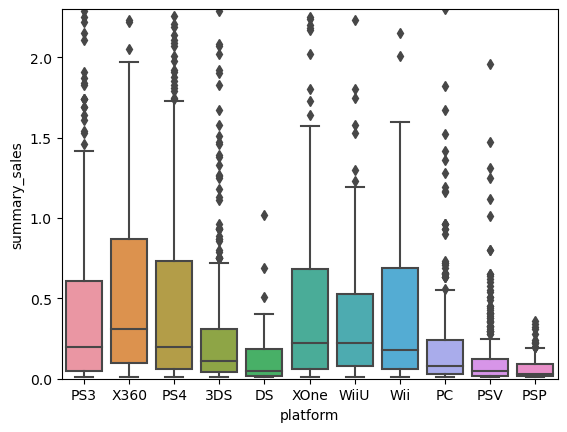

In [39]:
bx = sns.boxplot(data = current_data, x = 'platform', y = 'summary_sales')#построим boxplot
bx.set_ylim([0,2.3])#c заданным лимитом по оси y

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 

</div>

### Диаграмма рассеяния и корреляция между продажами и отзывами для PS3 

In [40]:
PS3_data = current_data.query('platform == "PS3"& user_score >=0 & critic_score >= 0')
#Построим диаграму размаха PS3 продаж от отзывов критиков, как платформе с наибольшими продажами

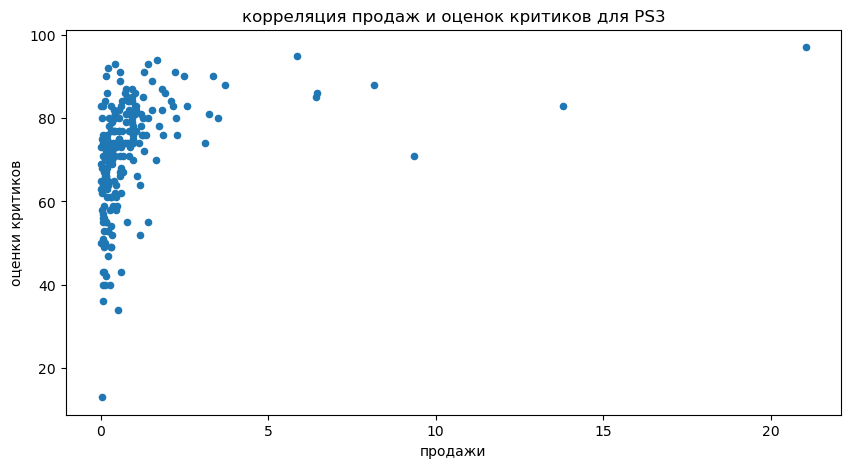

In [41]:
PS3_data.plot(kind = 'scatter', x = 'summary_sales', y = 'critic_score', figsize = (10,5))
plt.title('корреляция продаж и оценок критиков для PS3')
plt.xlabel('продажи')
plt.ylabel('оценки критиков')
plt.show()#построим диаграмму рассеяния

In [42]:
PS3_data['summary_sales'].corr(PS3_data['critic_score']) #посчитаем коэффициент Пирсона для корреляции оценок пользователей
#и суммарных продаж

0.3310566175801407

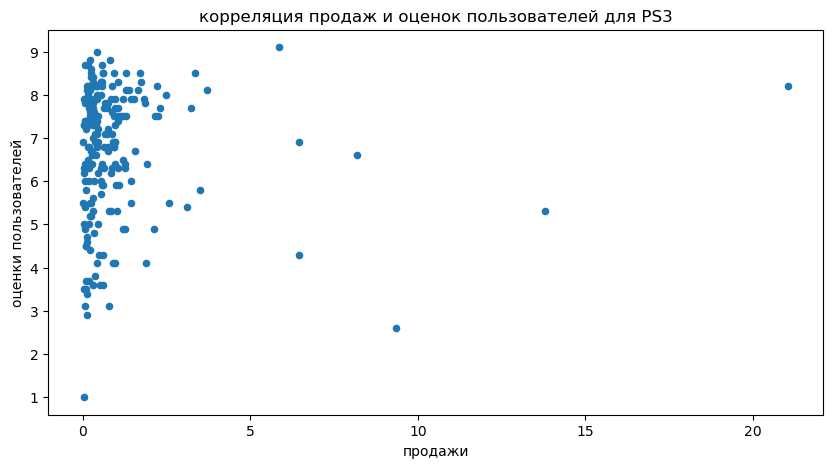

In [43]:
PS3_data.plot(kind = 'scatter', x = 'summary_sales', y = 'user_score', figsize = (10,5))#построим диаграмму рассеяния
plt.title('корреляция продаж и оценок пользователей для PS3')
plt.xlabel('продажи')
plt.ylabel('оценки пользователей')
plt.show();

In [44]:
PS3_data['summary_sales'].corr(PS3_data['user_score'])

0.0032274054930356904

По диаграмам размаха и коэфициенту Пирсона определяется слабое влияние отзывов критиков на продажи, а отзывы пользователей
не оказывают влияние на продажи.

### Диаграмма рассеяния и корреляция между продажами и отзывами для других платформам

In [45]:
other_plat_data = current_data.query('platform != "PS3" & user_score >=0 & critic_score >= 0') #выделим данные без учета PS3

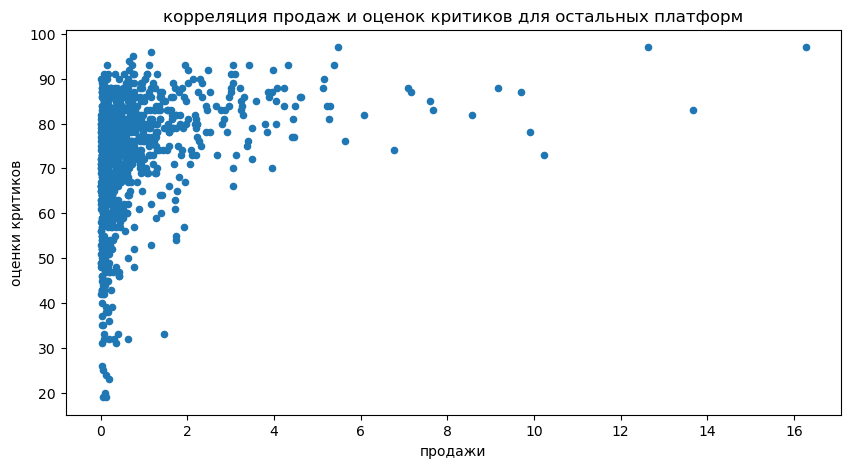

In [46]:
other_plat_data.plot(kind = 'scatter', x = 'summary_sales', y = 'critic_score', figsize = (10,5))#построим диаграмму размаха
plt.title('корреляция продаж и оценок критиков для остальных платформ')
plt.xlabel('продажи')
plt.ylabel('оценки критиков')
plt.show();

In [47]:
other_plat_data['summary_sales'].corr(other_plat_data['critic_score']) #посчитаем коэффициет Пирсона для отзывов критиков

0.3056654769744824

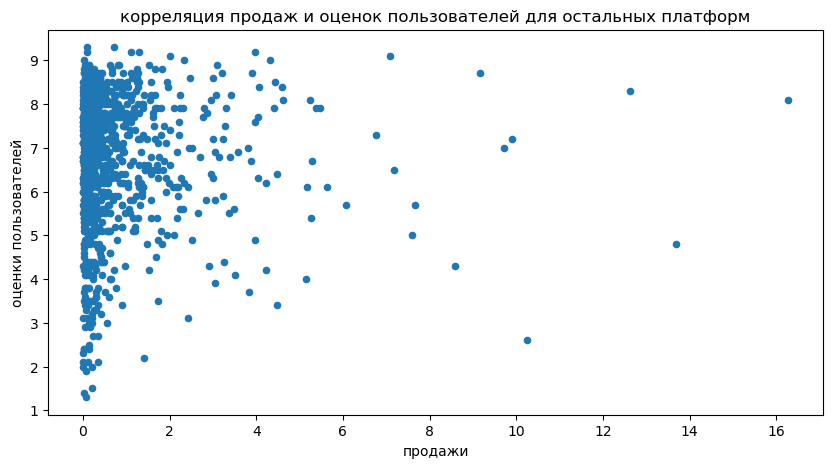

In [48]:
other_plat_data.plot(kind = 'scatter', x = 'summary_sales', y = 'user_score', figsize = (10,5)) #Построим диаграмму размаха
plt.title('корреляция продаж и оценок пользователей для остальных платформ')
plt.xlabel('продажи')
plt.ylabel('оценки пользователей')
plt.show();

In [49]:
other_plat_data['summary_sales'].corr(other_plat_data['user_score']) #посчитаем коэффициент Пирсона для отзывов пользователей

0.0008745978144136942

Вывод: Диаграммы размаха и вычисление коэффициента Пирсона для других платформ подтверждает выводы о платформе PS3.

### Анализ по жанрам

Text(0, 0.5, '')

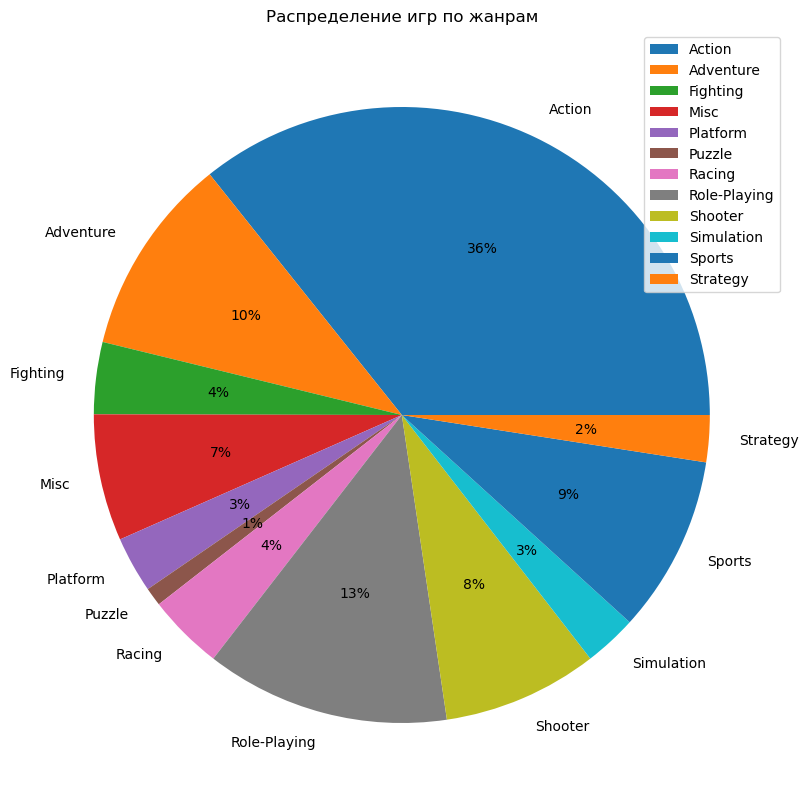

In [50]:
current_data.pivot_table(index = 'genre', values = 'name', aggfunc = 'count').plot(kind = 'pie', y = 'name', figsize = (20,10), title = 'Genres', autopct = '%1.0f%%')
#построим круговую диаграмму по жанрам
plt.title('Распределение игр по жанрам')
plt.ylabel('')

**Вывод**: По общему количеству игр лидируют жанры Аction (36%) и далее с Advent (11%) Adventure, Sports, Role-Playing, Music.
Наименьшее количеств игр в жанрах Puzzle (2%) и (3%).
При рассмотрении общего количества продаж игр по жанрам лидируют жанры: Action(26%), Shooter (19%), Sports (13%).  
Наименьшее количество продаж в жанрах Puzzle (1%), Adventure (2%) и Fighting (3%) и Simulation (3%).

Text(0, 0.5, '')

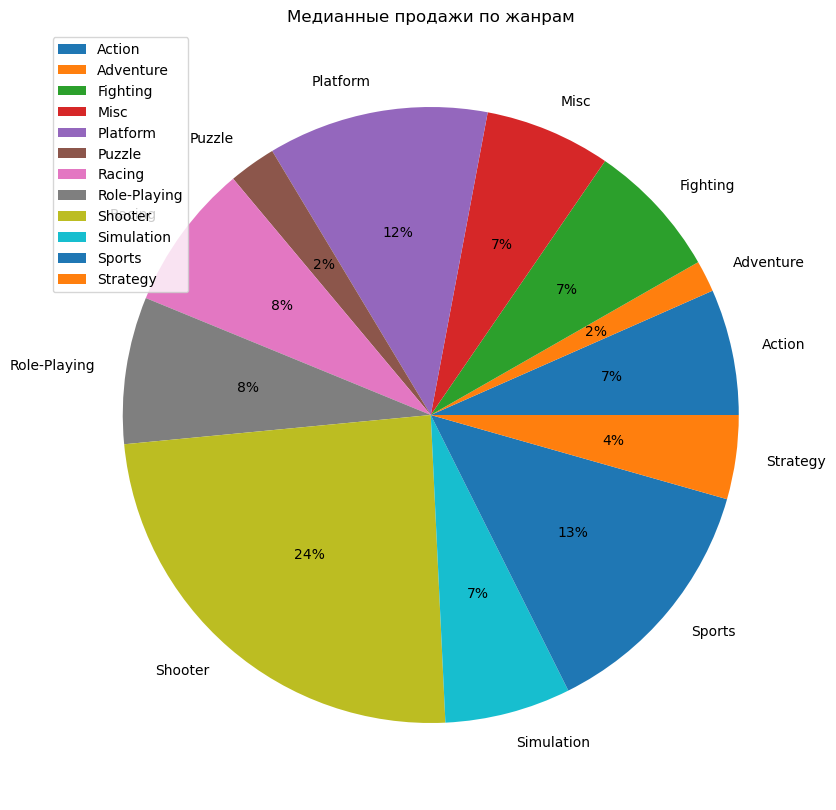

In [51]:
current_data.pivot_table(index = 'genre', values = 'summary_sales', aggfunc = 'median').plot(kind = 'pie', y = 'summary_sales', title = 'Median sales', figsize = (20,10), autopct = '%1.0f%%')
#построим круговую диаграмму медианных продаж по жанрам
plt.title('Медианные продажи по жанрам')
plt.ylabel('')

Вывод: По общему количеству игр лидируют жанры Аction (36%) и далее (10%) Adventure, Sports (9%), Shooter(8%).
Наименьшее количеств игр в жанрах Puzzle (1%), Platform(3%) и Simulation (3%).  
    
При рассмотрении медианного количества продаж игр по жанрам лидируют жанры: Shooter(24%), Sports (13%) и Role-Playing (13%).  
Наименьшее количество продаж в жанрах Puzzle (2%), Adventure (2%).

## Портрет пользователя по регионам

In [52]:
NA_top5 = current_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales',ascending = False).head(5)
#выделим топ 5 платформ на рынке северной америки

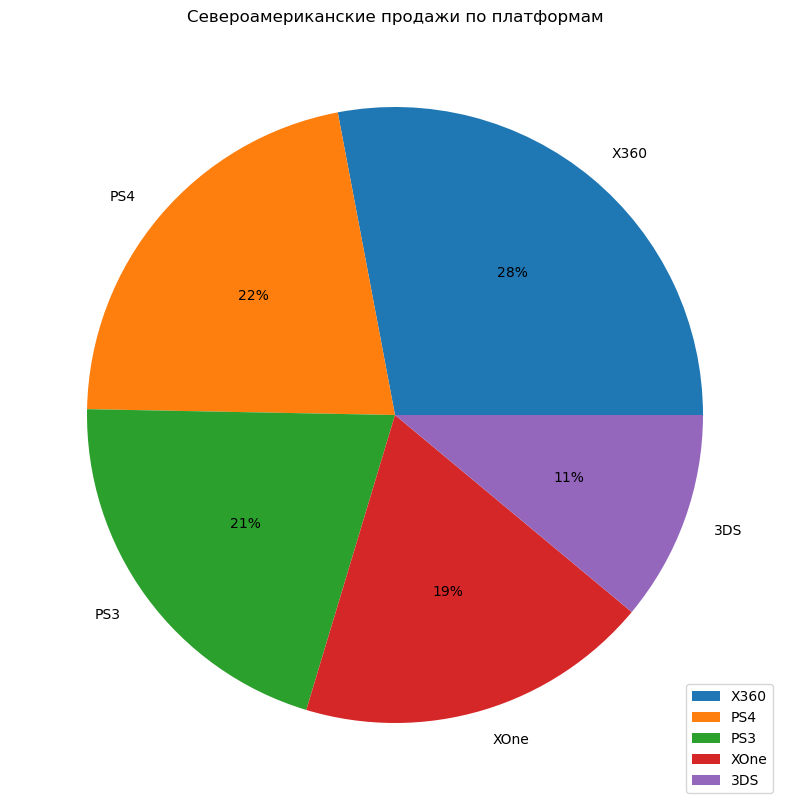

In [53]:
NA_top5.plot(kind = 'pie', y = 'na_sales', title = 'Североамериканские продажи по платформам', figsize = (20,10), autopct = '%1.0f%%')
#построим круговую диаграмму долей продаж по платформам на североамериканском рынке
plt.ylabel('')
plt.show();

In [54]:
EU_top5 = current_data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales',ascending = False).head(5)
#выделим топ 5 платформ на рынке европы

Text(0, 0.5, '')

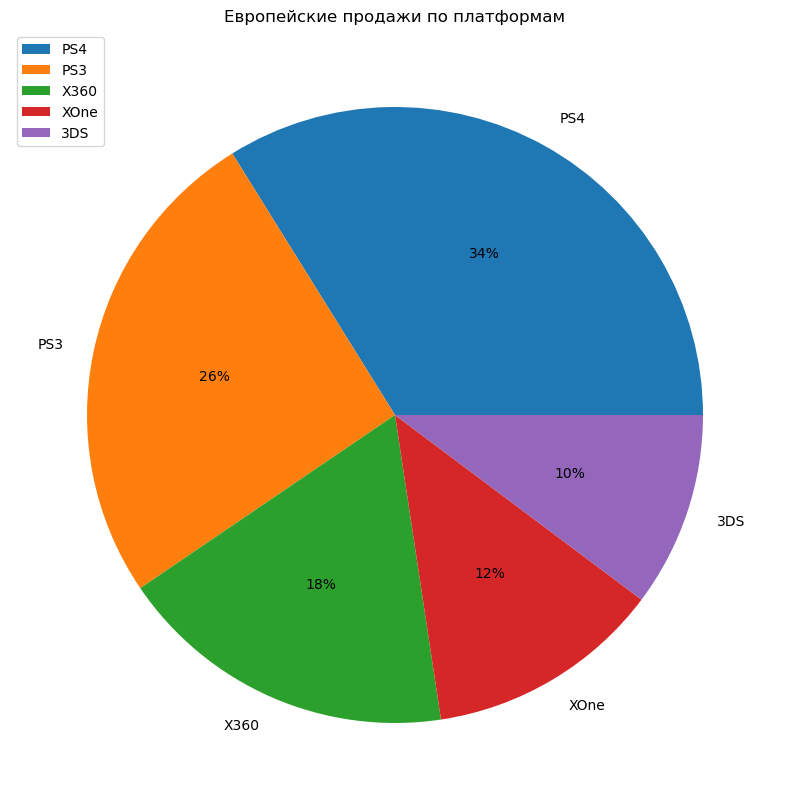

In [55]:
EU_top5.plot(kind = 'pie', y = 'eu_sales', title = 'Европейские продажи по платформам', figsize = (20,10), autopct = '%1.0f%%')
#построим круговую диаграмму долей продаж по платформам на европейском рынке
plt.ylabel('')

In [56]:
JP_top5 = current_data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales',ascending = False).head(5)
#выделим топ 5 платформ на рынке Японии

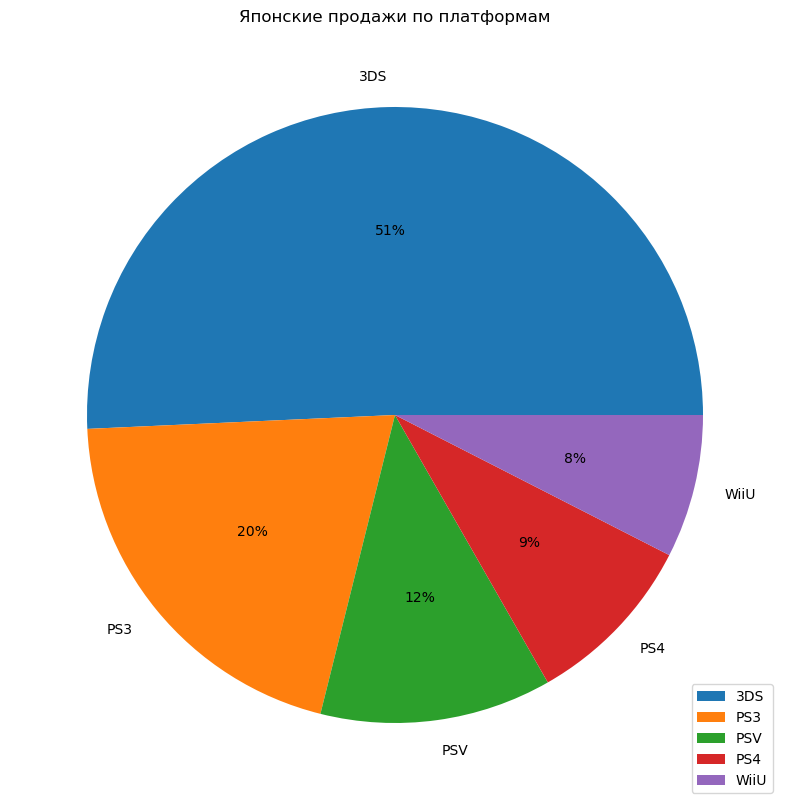

In [57]:
JP_top5.plot(kind = 'pie', y = 'jp_sales', title = 'Японские продажи по платформам', figsize = (20,10), autopct = '%1.0f%%')
#построим круговую диаграмму долей продаж по платформам на Японском рынке
plt.ylabel('')
plt.show()

In [58]:
other_top5 = current_data.pivot_table(index = 'platform', values = 'other_sales', aggfunc = 'sum')\
.sort_values(by = 'other_sales',ascending = False).head(5)
#выделим топ 5 платформ на остальном мировом рынке

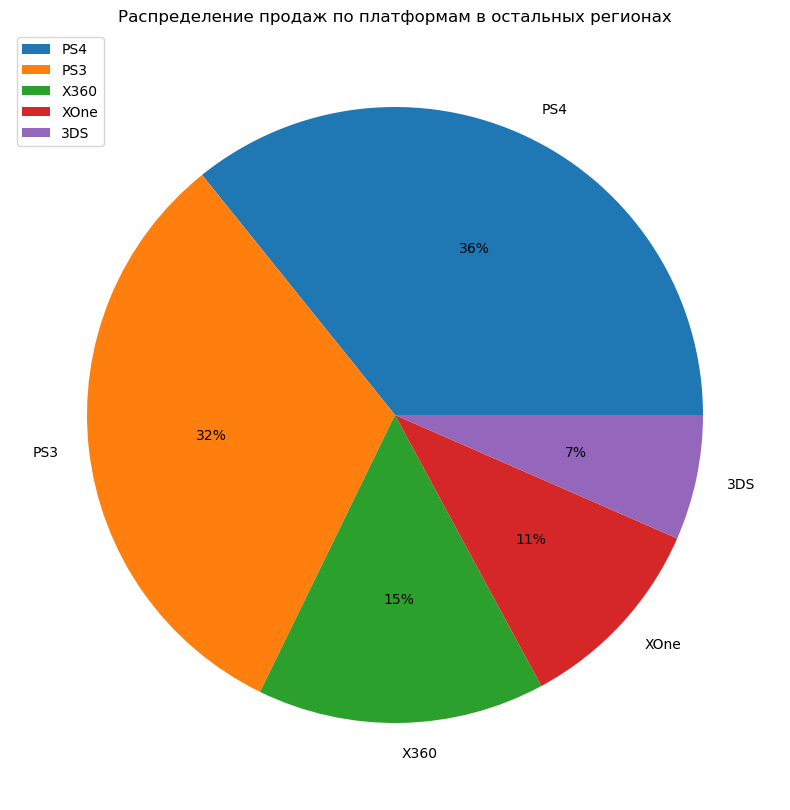

In [59]:
other_top5.plot(kind = 'pie', y = 'other_sales', title = 'Распределение продаж по платформам в остальных регионах', 
                figsize = (20,10), autopct = '%1.0f%%')
plt.ylabel('')
plt.show()
#построим круговую диаграмму долей продаж по платформам на остальном мировом рынке

Вывод: 
1. На североамериканском рынке лидирует платформа X360(28%). 
Далее представлены по убыванию:
- PS4(22%);
- PS3(21%);
- Xone(19%);
- 3Ds(11%).
2. На европейском рынке лидирует PS4 платформа (34%).
Далее представлены по убыванию:
- PS3(26%);
- X360(22%);
- XOne(12%);
- 3DS(10%).
3. На японском рынке лидирует 3DS платформа (51%).
Далее представлены по убыванию:
- PS3(20%)
- PSV(12%)
- PS4(9%)
- WiiU(8%)
4. На остальном мировом рынке лидирует платформа PS3 (36%).
 Далее представлены по убыванию:
- PS3(32%)
- X360(15%)
- XOne(11%)
- 3DS(7%)
 

In [60]:
top5_genres_NA = current_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales',ascending = False).head(5)
#выделим топ 5 жанров на североамериканском рынке

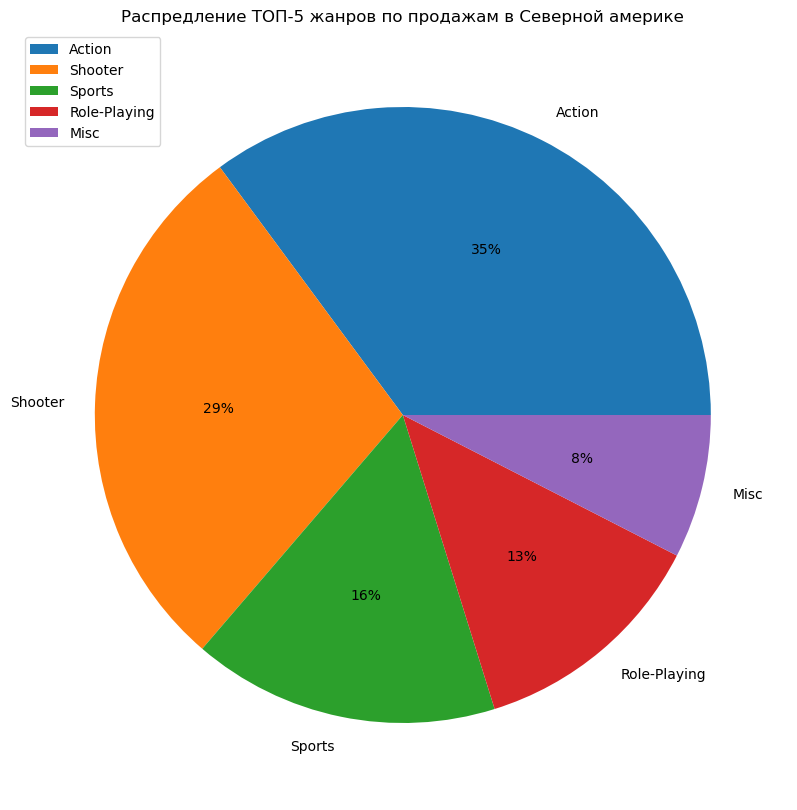

In [61]:
top5_genres_NA.plot(kind = 'pie', y = 'na_sales', title = 'Распредление ТОП-5 жанров по продажам в Северной америке',
                    figsize = (20,10), autopct = '%1.0f%%')
plt.ylabel('')
plt.show()
#построим груговую диаграмму по жанрам на североамериканском рынке

In [62]:
top5_genres_EU = current_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales',ascending = False).head(5)
#выделим топ 5 жанров на европейском рынке

Text(0, 0.5, '')

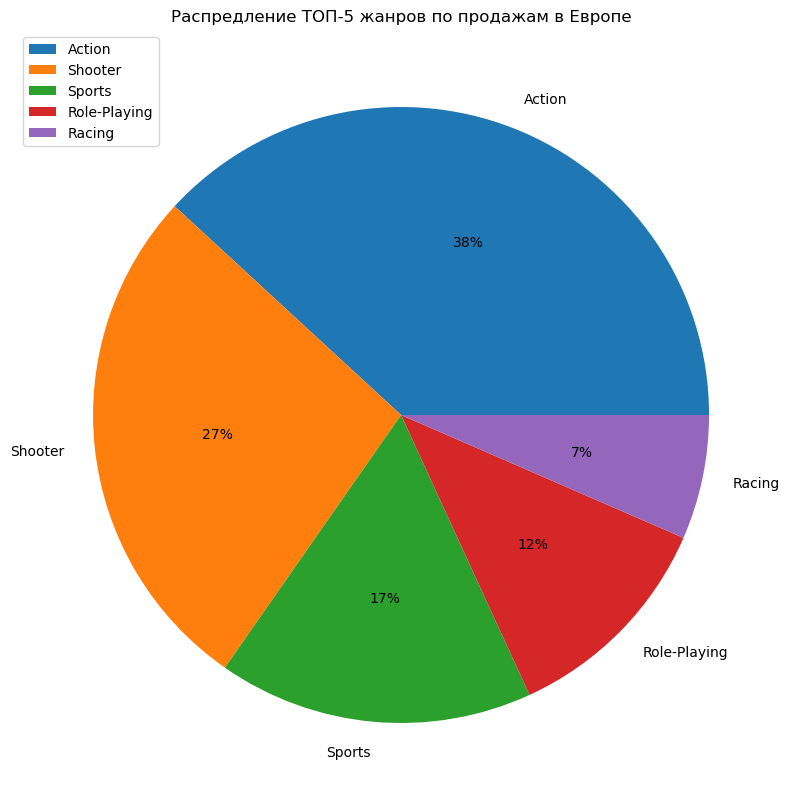

In [63]:
top5_genres_EU.plot(kind = 'pie', y = 'eu_sales', title = 'Распредление ТОП-5 жанров по продажам в Европе', figsize = (20,10), autopct = '%1.0f%%')
#построим груговую диаграмму по жанрам на европейском рынке
plt.ylabel('')

In [64]:
top5_genres_JP = current_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales',ascending = False).head(5)
#выделим топ 5 жанров на японском рынке

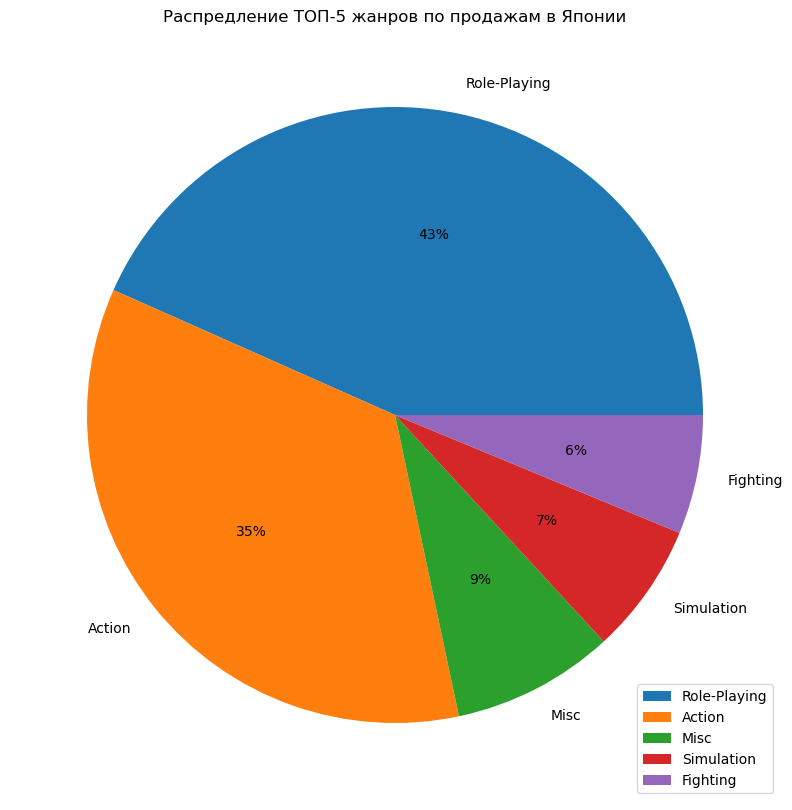

In [65]:
top5_genres_JP.plot(kind = 'pie', y = 'jp_sales', title = 'Распредление ТОП-5 жанров по продажам в Японии', figsize = (20,10), autopct = '%1.0f%%')
plt.ylabel('')
plt.show()
#построим груговую диаграмму по жанрам на японском рынке

In [66]:
top5_genres_other = current_data.pivot_table(index = 'genre', values = 'other_sales', aggfunc = 'sum')\
.sort_values(by = 'other_sales',ascending = False).head(5)
#выделим топ 5 жанров на остальном мировом рынке

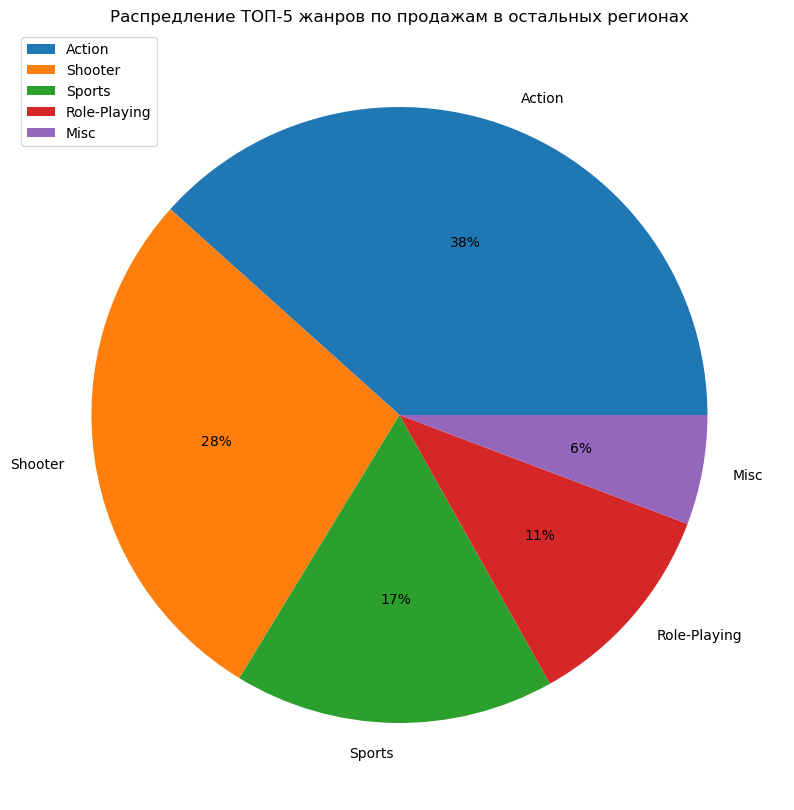

In [67]:
top5_genres_other.plot(kind = 'pie', y = 'other_sales', title = 'Распредление ТОП-5 жанров по продажам в остальных регионах', figsize = (20,10), autopct = '%1.0f%%')
#построим груговую диаграмму по жанрам на остальном мировом рынке
plt.ylabel('')
plt.show();

### Вывод:
    
1. На североамериканском рынке лидирует платформа Action(38%). 
Далее представлены по убыванию:
- Shooter(29%);
- Sports (16%);
- Role-Playing (13%);
- Music (8%).
    
2. На европейском рынке лидирует жанр Action (38%).
Далее представлены по убыванию:
- Shooter(27%);
- Sports(17%);
- Role-Playing(12%);
- Racing(8%).
3. На японском рынке лидирует жанр Role-Play (43%).
Далее представлены по убыванию:
- Action(35%)
- Music(9%)
- Simulation(7%)
- Fighting(6%)
4. На остальном мировом рынке лидирует жанр Action (38%).
 Далее представлены по убыванию:
- Shooter(28%)
- Sports(17%)
- Role-Playing(11%)
- Music(6%)

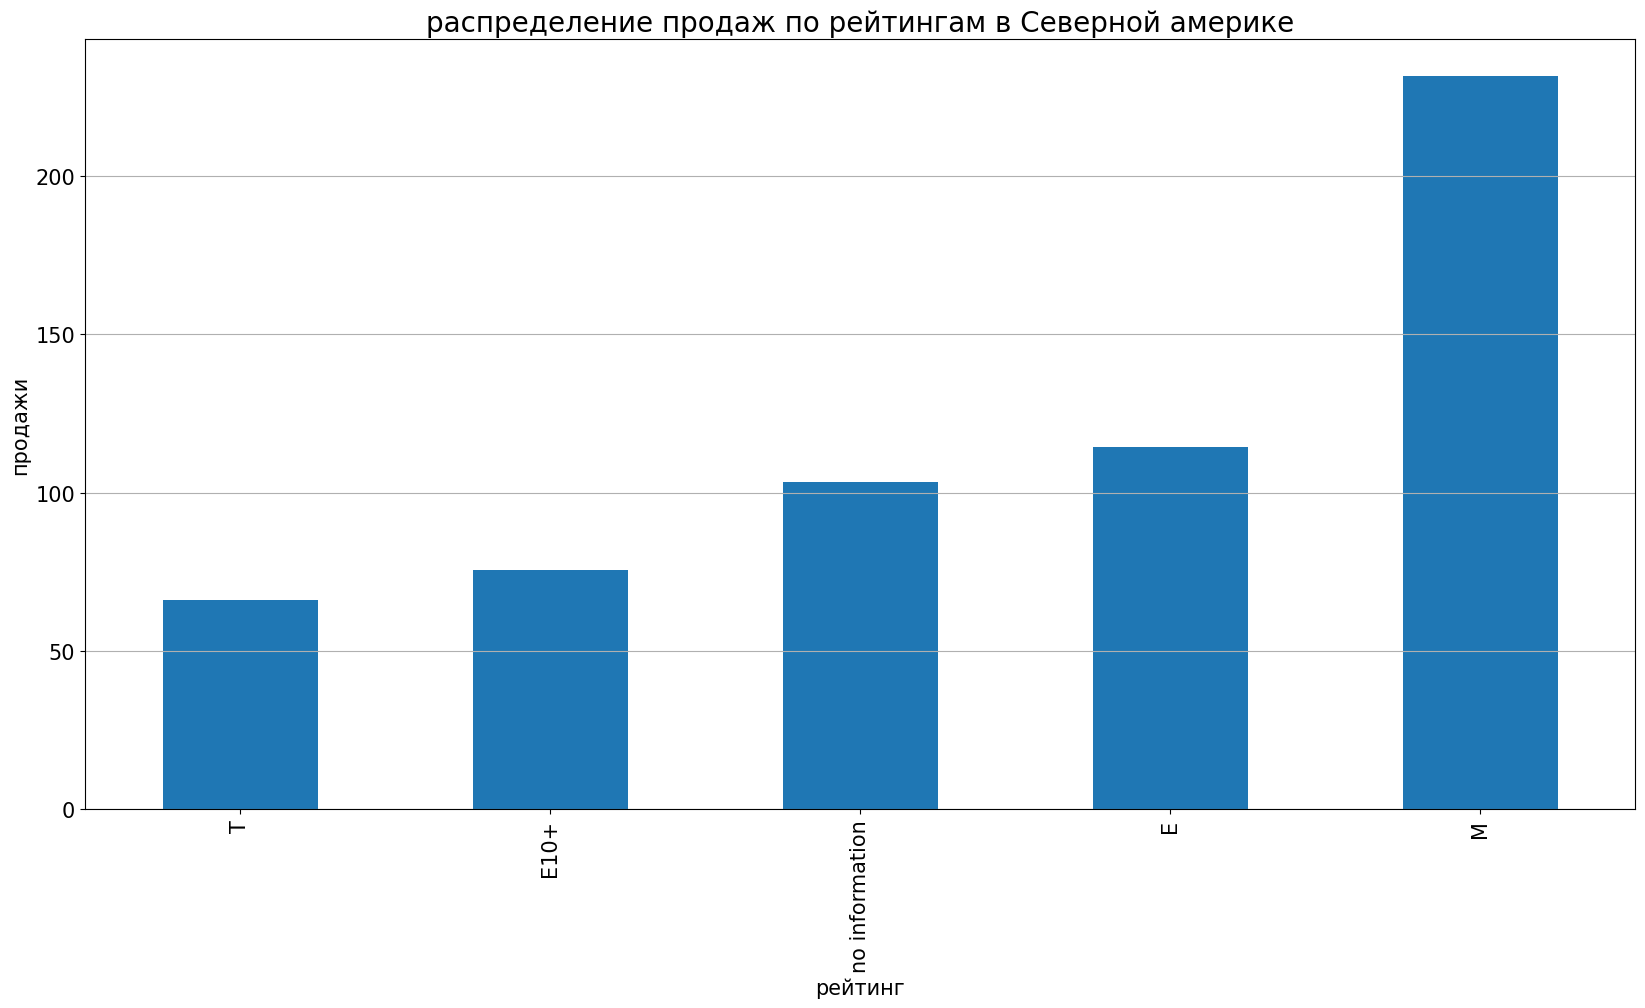

In [68]:
current_data.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')\
.sort_values(by = 'na_sales')\
.plot(kind = 'bar', figsize = (20,10), legend = False, fontsize=15)
#сгрупируем продажи по рейтингу на североамериканском рынке и построим график
plt.grid(axis = 'y')
plt.title('распределение продаж по рейтингам в Северной америке',fontsize=20)
plt.ylabel('продажи',fontsize=15)
plt.xlabel('рейтинг', fontsize=15)
plt.show();

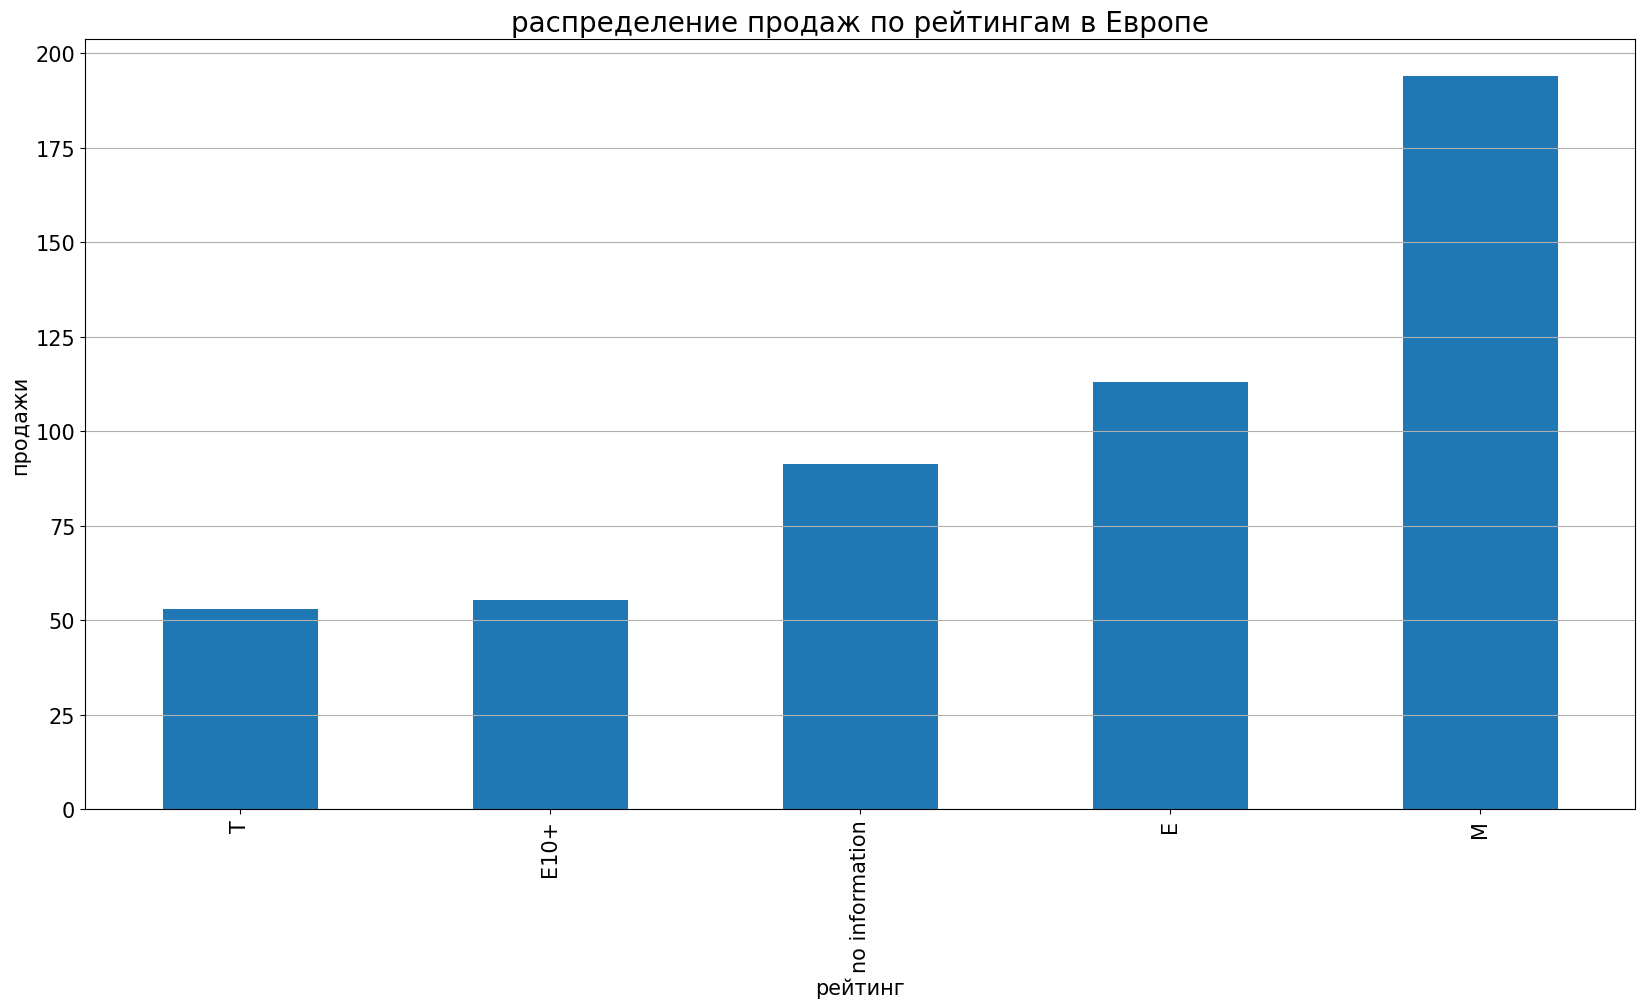

In [69]:
current_data.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')\
.sort_values(by = 'eu_sales').plot(kind = 'bar', title = 'Sales by rating in EU', figsize = (20,10), fontsize=15, legend = False)
#сгрупируем продажи по рейтингу на европейском рынке и построим график
plt.grid(axis = 'y')
plt.title('распределение продаж по рейтингам в Европе',fontsize=20)
plt.ylabel('продажи',fontsize=15)
plt.xlabel('рейтинг', fontsize=15)
plt.show();

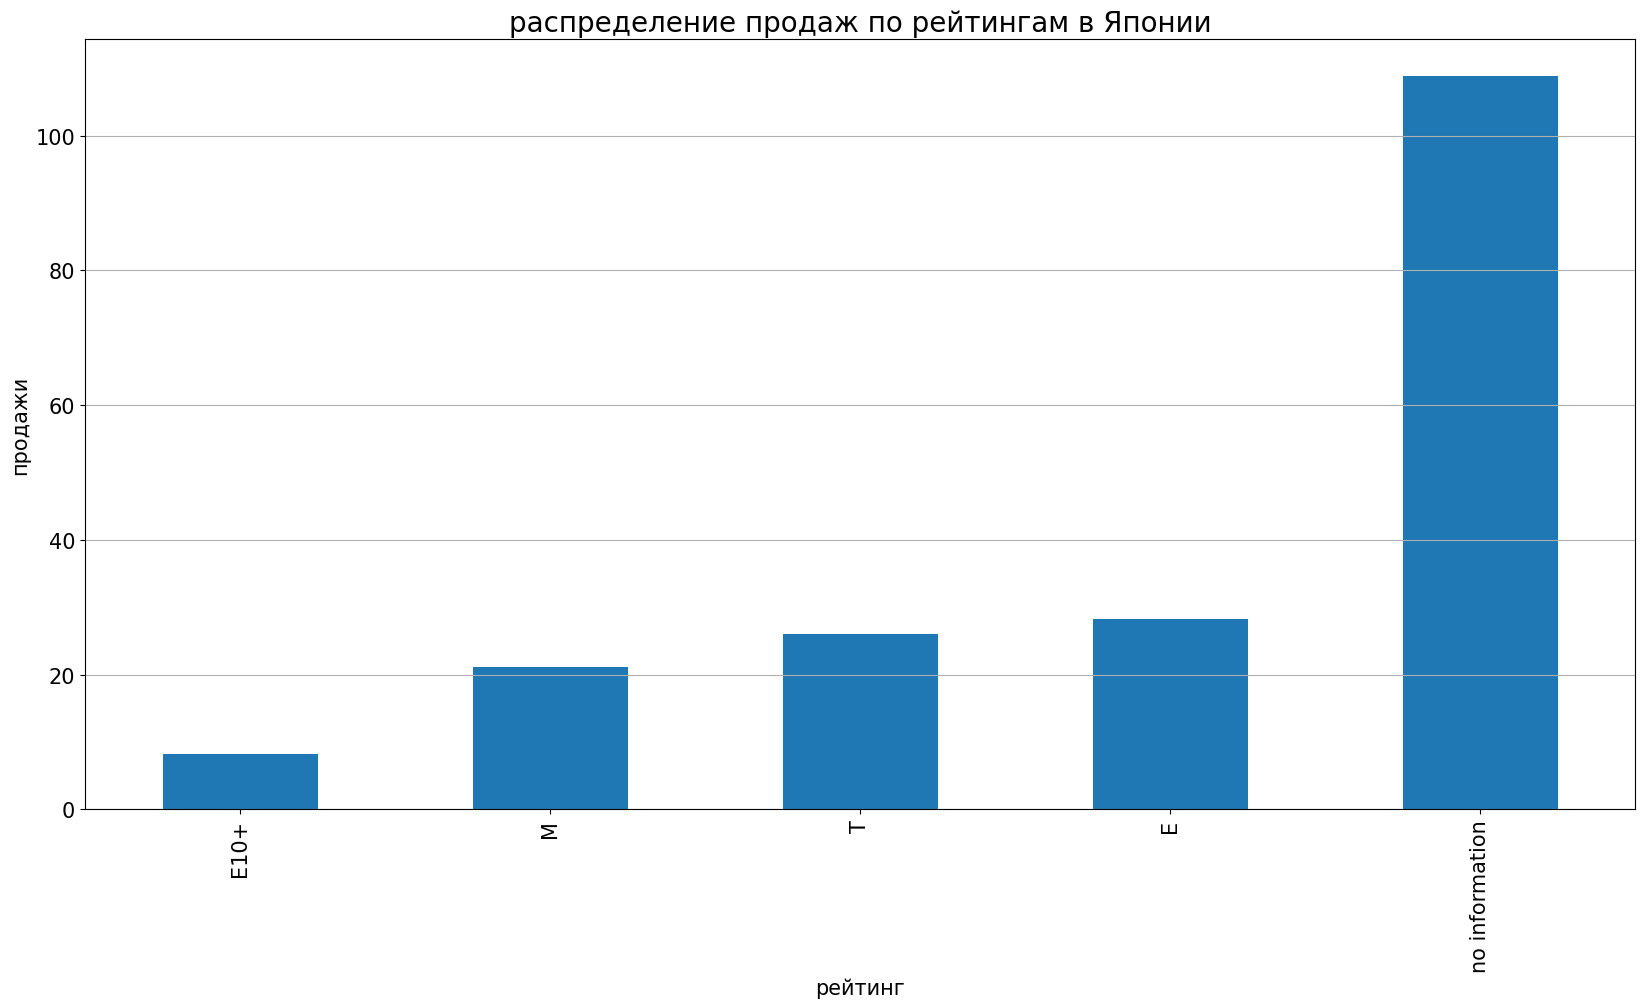

In [70]:
current_data.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')\
.sort_values(by = 'jp_sales').plot(kind = 'bar', title = 'Sales by rating in JP', figsize = (20,10), legend = False, fontsize = 15)
#сгрупируем продажи по рейтингу на японском и построим график
plt.grid(axis = 'y')
plt.title('распределение продаж по рейтингам в Японии',fontsize=20)
plt.ylabel('продажи',fontsize=15)
plt.xlabel('рейтинг', fontsize=15)
plt.show();

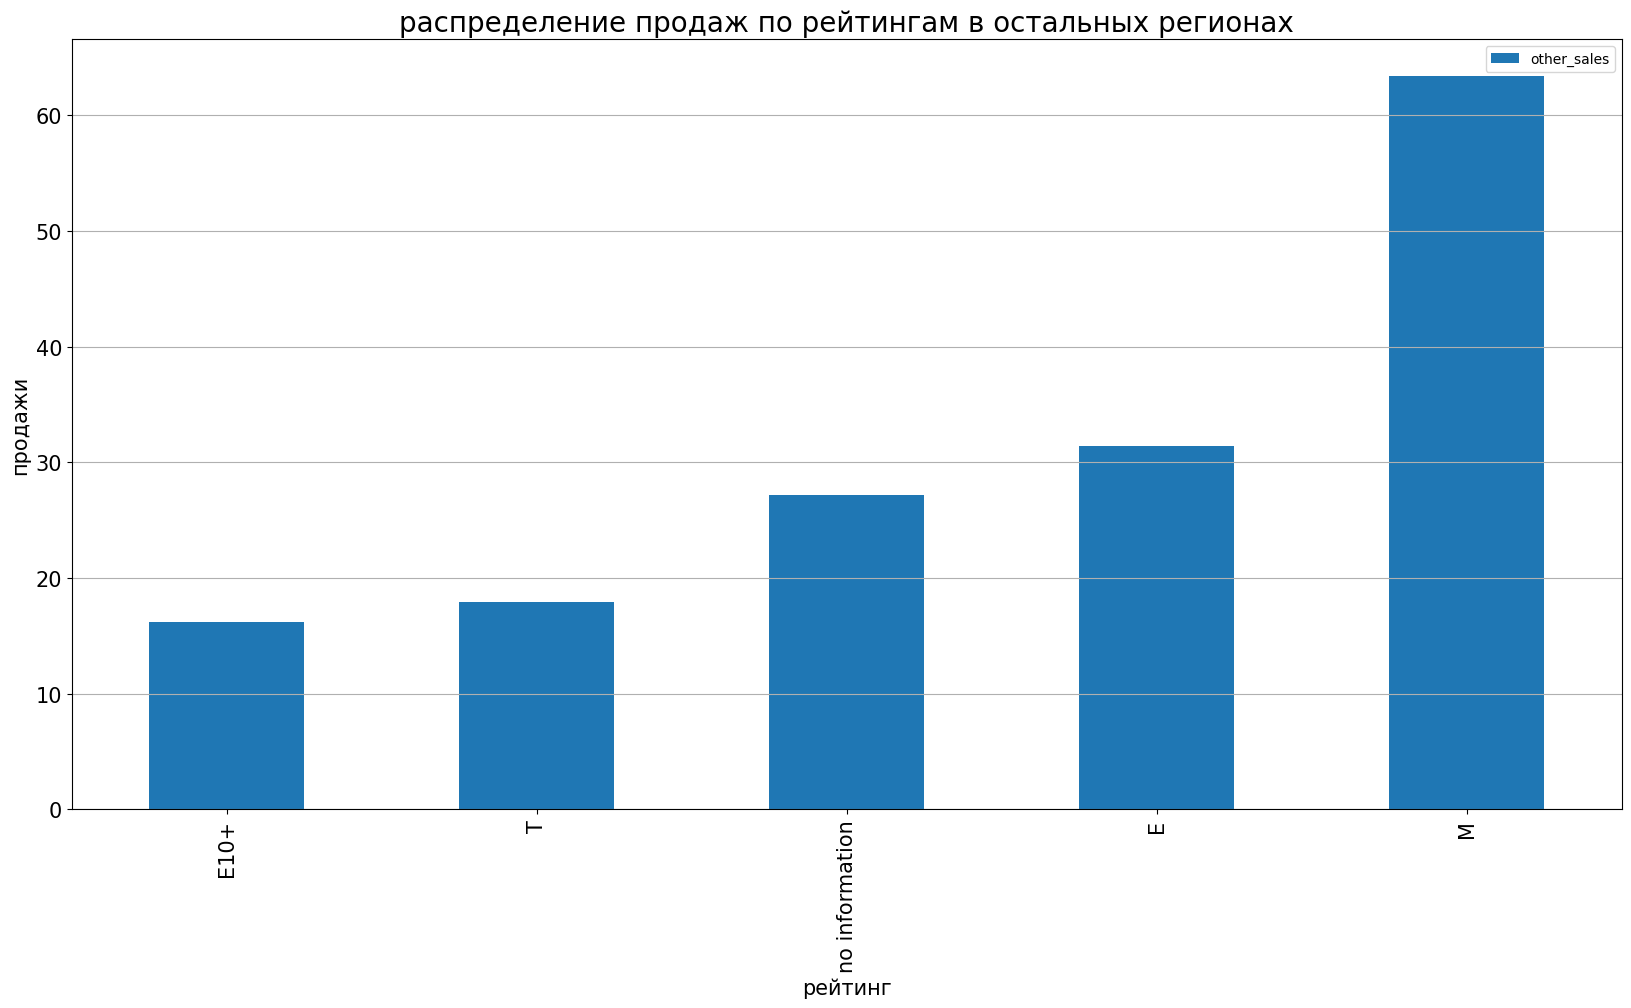

In [71]:
current_data.pivot_table(index = 'rating', values = 'other_sales', aggfunc = 'sum')\
.sort_values(by = 'other_sales').plot(kind = 'bar', title = 'Sales by rating in other regions', figsize = (20,10), fontsize = 15)
#сгрупируем продажи по рейтингу на остальном мировом рынке и построим график
plt.grid(axis = 'y')
plt.title('распределение продаж по рейтингам в остальных регионах',fontsize=20)
plt.ylabel('продажи',fontsize=15)
plt.xlabel('рейтинг', fontsize=15)
plt.show();

Вывод: Во всех представленных регионах по продажам лидируют игры с рейтингом М (для взрослых) и E (для всех), кроме японского  
рынка, где в лидерах игры с отсутвующим рейтингом. Однако в японии далее идут продажи игр с теми же рейтингами, что и в остальных регионах. Исходя из предсталенной информации можно сделать вывод, что на продажах рейтинг в отдельных регионах играет малую роль.


## Проверка гипотез о равенстве оценок пользователей

In [72]:
xone_rating = current_data[(current_data['platform'] == 'XOne')&
(current_data['user_score'] >= 0)&(current_data['critic_score'] >= 0)]['user_score']# выберим оценки пользователей для XOne

In [73]:
pc_rating = current_data[(current_data['platform'] == 'PC') &
(current_data['user_score'] >= 0)&(current_data['critic_score'] >= 0)]['user_score'] 
#выберим оценки пользователей для PC

In [74]:
from scipy import stats as st #импортируем необходимую библиотеку

Сформируем нулевую гипотезу, что средняя оценка пользователей для платформы PC равна средней оценке пользователей для XOne.
Сформируем альтернативную гипотезу, что средння что средняя оценка пользователей для платформы PC не равна средней оценке   пользователей для XOne.  
Для проверки гипотезы будем использовать t-тест:
 - выборки независимы друг от друга.
 - выборки имееют достаточно большой размер.

In [75]:
alpha = .05 #зададим критический уровень статистической важности

results_platform = st.ttest_ind(xone_rating, pc_rating, equal_var = False) #проведем t-тест для выборок

In [76]:
print(results_platform.pvalue) #выведим значение p-value
if results_platform.pvalue < alpha:# выведим сообщение о проверке гипотезы
    print('Отвергаем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотезу')

0.5926561176517491
Принимаем нулевую гипотезу


In [77]:
action_rating = current_data[(current_data['genre'] == 'Action')&
(current_data['user_score'] >= 0)&(current_data['critic_score'] >= 0)]['user_score'] 
#выберим оценки пользователей для жанра Action

In [78]:
sports_rating = current_data[(current_data['genre'] == 'Sports')&
(current_data['user_score'] >= 0)&(current_data['critic_score'] >= 0)]['user_score'] 
#выберим оценки пользователй для жанра Sports

Сформируем нулевую гипотезу, что средняя оценка пользователей для жанра Action не равна средней оценке пользователей  
для жанра Sports. Сформируем альтернативную гипотезу, что средняя оценка пользователей для жанра Action не равна средней  
оценке пользователей для жанра Sports.  
Для тестирования будем использовать t-тест, так как: 
- выборки независимы друг от друга.
- выборки имеют достаточно большой размер.

Сформируем нулевую гипотезу , что средняя оценка пользователей для жанра Action равна средней оценке пользователей
для жанра Sports. Сформируем альтернативную гипотезу, что средняя оценка пользователей для жанра Action не равна средней  
оценке пользователей для жанра Sports.

In [79]:
alpha = .05 #зададим критический уровень статистической важности
results_genre = st.ttest_ind(action_rating, sports_rating, equal_var = False) #проведем t-тест для выборок

In [80]:
print(results_genre.pvalue) #выведим значение p-value
if results_genre.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотезу')

5.858072645452818e-14
Отвергаем нулевую гипотезу


**Вывод**:
   1. В первом случае проведя t-тест принимаем нулевую гипотезу, что средняя оценка пользователей для платформы PC равна средней оценке пользователей для XOne.
   2. Во втором случае принимаем альтернативную гипотезу гипотезу, о том что средняя оценка пользователей для жанра Action не равна средней оценке пользователей для жанра Sports.

## Вывод

В данном исследовании мы проанализировали  исторические данные о продажах игр, оценки пользователей и экспертов, жанры и
платформы с 1980 по 2016 год.
Перед начлом исследоваиня провели начальную подготову данных:
- изучили данные о представленном датасете;
- привели данные к единому стилю;
- изменили форматы данных на необходимые;
- обработали пропуски и устранили их где это было возможно;
- добавили данные о суммарных продажах во всех регионах;

Далее мы провели исследовательский анализ данных, описав следующие параметры: 
 1. Провели анализ продаж игр во всех регионах, выявив следующие тенденции: 
- до середны 1990-х годов не отмечалось резкого роста продаж. С середины 1990-х годов до начала 2010-х наблюдается значительный рост годовых продаж с несколькими плато. с начала 2010-х наблюдается резкий спад годовых продаж. Наиболее интересен период с середины 1990-х годов по 2016 год, так как это период количестово прадаж наиболее велико, а так же наблюдается разнонаправленная динамика.  
 2. Провели анализ продаж игр по различным платформам, сделав вывод, что средний срок жизни платформы ~ 5 лет.
 3. Вывбрали актуальный период продаж и провели оценку потенциально растущих платформ:
  - PS4, XOne и PC.
 4. Выявили отсутвие зависимости продаж от отзывов на одной платформе (PS3) и подтвердили для остальных.
 5. Провели анализ глобального распределения игр по жанрам: 
 - По общему количеству игр лидируют жанры Аction (28%) и далее с равными (11%) Adventure, Sports, Role-Playing, Music.
Наименьшее количеств игр в жанрах Puzzle (2%) и (3%)
 6. Провели анализ глобального распределния продаж по жанрам:
 - при рассмотрении общего количества продаж игр по жанрам лидируют жанры: Action(26%), Shooter (19%), Sports (13%).  
Наименьшее количество продаж в жанрах Puzzle (1%), Adventure (2%) и Fighting (3%) и Simulation (3%).

7. Составили портрет пользователя по представленным регионам выделив топ 5 платформ и жанров:

 7.1. Анализ по платформам:
- На североамериканском рынке лидирует платформа X360(38%). 
Далее представлены по убыванию:
 - PS3(26%);
 - Wii(14%);
 - PS4(12%);
 - Xone(11%).
 - На европейском рынке лидирует PS3 платформа (33%).
Далее представлены по убыванию:
 - X360(26%);
 - PS4(22%);
 - PC(11%);
 - Wii(10%).
- На японском рынке лидирует 3DS платформа (40%).
Далее представлены по убыванию:
 - PS3(24%)
 - PSP(17%)
 - DS(11%)
 - PSV(9%)
- На остальном мировом рынке лидирует платформа PS3 (40%).
 Далее представлены по убыванию:
  - PS4(23%)
  - X360(22%)
  - Wii(8%)
  - Xone(7%)
  
 7.2 Анализ по жанрам:
- На североамериканском рынке лидирует платформа X360(38%). 
Далее представлены по убыванию:
 - PS3(26%);
 - Wii(14%);
 - PS4(12%);
 - Xone(11%).
 - На европейском рынке лидирует PS3 платформа (33%).
Далее представлены по убыванию:
 - X360(26%);
 - PS4(22%);
 - PC(11%);
 - Wii(10%).
- На японском рынке лидирует 3DS платформа (40%).
Далее представлены по убыванию:
 - PS3(24%)
 - PSP(17%)
 - DS(11%)
 - PSV(9%)
- На остальном мировом рынке лидирует платформа PS3 (40%).
 Далее представлены по убыванию:
  - PS4(23%)
  - X360(22%)
  - Wii(8%)
  - Xone(7%)
 7.3. Изучили влияние рейтинга ESRB на продажи в различных регионах, сделав вывод о незначительном его влиянии.
8.  Подтвердили гипотезу, что средняя оценка пользователей для платформы PC равна средней оценке пользователей для XOne и опровергли гипотезу, что средняя оценка пользователей для жанра Action не равна средней оценке пользователей для жанра Sports.

В данном исследовании мы проанализировали  исторические данные о продажах игр, оценки пользователей и экспертов, жанры и
платформы с 1980 по 2016 год.
Перед начлом исследоваиня провели начальную подготову данных:
- изучили данные о представленном датасете;
- привели данные к единому стилю;
- изменили форматы данных на необходимые;
- обработали пропуски и устранили их где это было возможно;
- добавили данные о суммарных продажах во всех регионах;

Далее мы провели исследовательский анализ данных, описав следующие параметры: 
 1. Провели анализ продаж игр во всех регионах, выявив следующие тенденции: 
- до середны 1990-х годов не отмечалось резкого роста продаж. С середины 1990-х годов до начала 2010-х наблюдается значительный рост годовых продаж с несколькими плато. с начала 2010-х наблюдается резкий спад годовых продаж. Наиболее интересен период с середины 1990-х годов по 2016 год, так как это период количестово прадаж наиболее велико, а так же наблюдается разнонаправленная динамика.  
 2. Провели анализ продаж игр по различным платформам, сделав вывод, что средний срок жизни платформы ~ 5 лет.
 3. Вывбрали актуальный период продаж и провели оценку потенциально растущих платформ:
  - PS4, XOne и PC.
 4. Выявили отсутвие зависимости продаж от отзывов на одной платформе (PS3) и подтвердили для остальных.
 5. Провели анализ глобального распределения игр по жанрам: 
 - По общему количеству игр лидируют жанры Аction (36%) и далее (10%) Adventure, Sports (9%), Shooter(8%).
Наименьшее количеств игр в жанрах Puzzle (1%), Platform(3%) и Simulation (3%)
 6. Провели анализ глобального распределния продаж по жанрам:
 - При рассмотрении медианного количества продаж игр по жанрам лидируют жанры: Shooter(24%), Sports (13%) и Role-Playing (13%). 
Наименьшее количество продаж в жанрах Puzzle (2%), Adventure (2%).

7. Составили портрет пользователя по представленным регионам выделив топ 5 платформ и жанров:

 7.1. Анализ по платформам:
Вывод: 
- На североамериканском рынке лидирует платформа X360(28%). 
Далее представлены по убыванию:
 - PS4(22%);
 - PS3(21%);
 - Xone(19%);
 - 3Ds(11%).
- На европейском рынке лидирует PS4 платформа (34%).
Далее представлены по убыванию:
 - PS3(26%);
 - X360(22%);
 - XOne(12%);
 - 3DS(10%).
- На японском рынке лидирует 3DS платформа (51%).
Далее представлены по убыванию:
 - PS3(20%)
 - PSV(12%)
 - PS4(9%)
 - WiiU(8%)
- На остальном мировом рынке лидирует платформа PS3 (36%).
 Далее представлены по убыванию:
 - PS3(32%)
 - X360(15%)
 - XOne(11%)
 - 3DS(7%)
  
 7.2 Анализ по жанрам:
- На североамериканском рынке лидирует платформа Action(38%). 
Далее представлены по убыванию:
 - Shooter(29%);
 - Sports (16%);
 - Role-Playing (13%);
 - Music (8%).
    
- На европейском рынке лидирует жанр Action (38%).
Далее представлены по убыванию:
 - Shooter(27%);
 - Sports(17%);
 - Role-Playing(12%);
 - Racing(8%).
- На японском рынке лидирует жанр Role-Play (43%).
Далее представлены по убыванию:
 - Action(35%)
 - Music(9%)
 - Simulation(7%)
 - Fighting(6%)
- На остальном мировом рынке лидирует жанр Action (38%).
 Далее представлены по убыванию:
 - Shooter(28%)
 - Sports(17%)
 - Role-Playing(11%)
 - Music(6%)
 7.3. Изучили влияние рейтинга ESRB на продажи в различных регионах, сделав вывод о незначительном его влиянии.   
8.  Приняли нулевую гипотезу, что средняя оценка пользователей для платформы PC равна средней оценке пользователей для XOne и приняли альтернативную гипотезу, что средняя оценка пользователей для жанра Action не равна средней оценке пользователей для жанра Sports.  
    
    **В совокупности можно сделать вывод, что наиболее перспективное направление игры в жанре Shooter и Sports выпущенные на платформах PS4 и XOne**.